# 1. Libraries and Packages

In [1]:
# import general packages - numpy,pandas,seaborn,matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# 2. Import Cleaned Dataset

In [2]:
#Import the data set
traindata = pd.read_csv('cleaned_data.csv')
traindata.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


# 3. Model 2: Logistic Regression Model 

## Background Information about Logistic Regression Model:

Logistic regression is a statistical model that is used to analyze the relationship between a binary dependent variable and one or more independent variables. The dependent variable takes only two possible values, such as 0 or 1, true or false, yes or no, etc. 

In logistic regression, the dependent variable is modeled using a logistic function, which produces an S-shaped curve that maps any input value to a value between 0 and 1. This allows the model to estimate the probability of the dependent variable being true (1) or false (0) based on the values of the independent variables.

Logistic regression is commonly used in many fields, including finance, marketing, and healthcare, to predict the likelihood of an event occurring or to identify the factors that are most strongly associated with an outcome.

In this case, we have decided to use Logistic Regression Model to analyse the likelihood of someone getting stroke given the 8 factors. 

### Step 1: Separate predictors and responses

In [3]:
stroke = pd.DataFrame(traindata["stroke"])
predictors = pd.DataFrame(traindata[["sex", "age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi", "smoking_status"]])

### Step 2: Split the dataset into training and testing datasets in 8:2 ratio 

In [4]:
# Split the Dataset into Train and Test
stroke_train, stroke_test, predictors_train, predictors_test = train_test_split(stroke, predictors, test_size = 0.2, random_state = 42)

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model and fit it to the training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(predictors_train, stroke_train)

# Use the model to make predictions on the testing data
stroke_pred = logreg.predict(predictors_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(stroke_test, stroke_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6835985312117503


              precision    recall  f1-score   support

           0    0.66002   0.74957   0.70195      4061
           1    0.71417   0.61840   0.66284      4109

    accuracy                        0.68360      8170
   macro avg    0.68709   0.68398   0.68239      8170
weighted avg    0.68725   0.68360   0.68228      8170



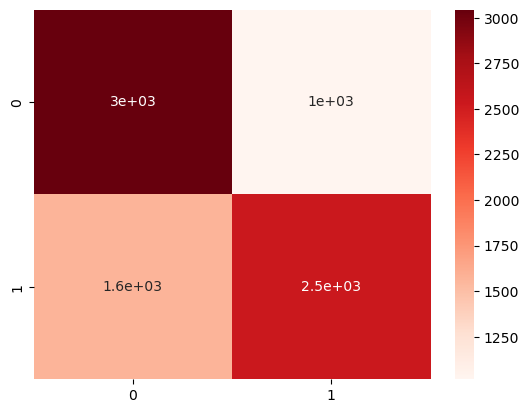

In [6]:
cm = confusion_matrix(stroke_test, stroke_pred)
sb.heatmap(cm, annot=True, cmap='Reds')

# Create a classification report
cr = classification_report(stroke_test, stroke_pred, digits=5)
print(cr)

# 4. Optimisation of Logistic Regression Model

In [7]:
param_grid = [    
    {'penalty' : ['l2'],
    'C' : [100, 200, 500],
    'solver' : ['lbfgs','sag','saga', 'liblinear'],
    'max_iter' : [100,500]
    }
]

In [8]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(predictors_train,stroke_train)

print (f'Accuracy - : {best_clf.score(predictors_test,stroke_test):.3f}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Accuracy - : 0.684


In [9]:
best_clf.best_estimator_

LogisticRegression(C=100, max_iter=500)

              precision    recall  f1-score   support

           0    0.66017   0.75055   0.70247      4061
           1    0.71489   0.61816   0.66301      4109

    accuracy                        0.68397      8170
   macro avg    0.68753   0.68435   0.68274      8170
weighted avg    0.68769   0.68397   0.68262      8170



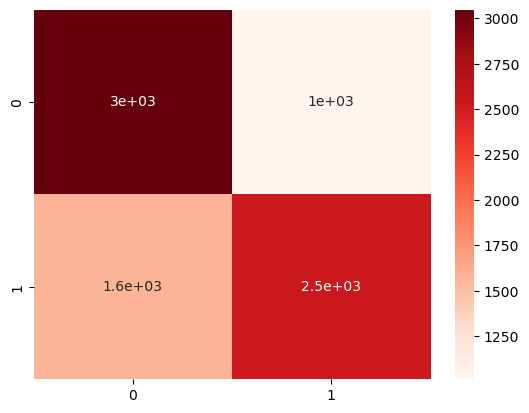

In [10]:
stroke_pred = best_clf.predict(predictors_test)

cm = confusion_matrix(stroke_test, stroke_pred)
sb.heatmap(cm, annot=True, cmap='Reds')

# Create a classification report
cr = classification_report(stroke_test, stroke_pred, digits=5)
print(cr)

# 5. Final Note on Logistic Regression Model

By finding out the hyperparameters for Logistic Regression Model, we have improved the accuracy of the model from 0.6835 to 0.684, a very small improvement from the previous model. While it is true that the accuracy of the model has improved, we feel that the improvement is not justified by the amount of computing power required to improve the classification algorithm. 

Moreover, this model might not work well for other scenarios where there are categorical variables with many categories because the model might become overly complex and overfit the data, leading to inaccurate predictions. 